In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
dataset_dir='caltech-101-img'
dataset_datagen=ImageDataGenerator(
    rescale=1.0/255
)

batch_size=2000
dataset_generator=dataset_datagen.flow_from_directory(dataset_dir,target_size=(64,64),batch_size=batch_size,class_mode='categorical')

Found 9144 images belonging to 102 classes.


In [3]:
x_train,y_train=dataset_generator[0]
x_test,y_test=dataset_generator[1]

print(len(x_train))
print(len(x_test))

2000
2000


In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import Adam

In [5]:
from tensorflow.keras.applications import VGG16

In [6]:
weights_path='vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
base_model=VGG16(weights=weights_path,include_top=False,input_shape=(64,64,3))

In [110]:
for layer in base_model.layers:
    layer.trainable=False

In [114]:
x=Flatten()(base_model.output)
x=Dense(64,activation='relu')(x)
predictions= Dense(102,activation='softmax')(x)

model=Model(inputs=base_model.input,outputs=predictions)
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0   

In [115]:
model.fit(x_train,y_train,batch_size=64,epochs=10,validation_data=(x_test,y_test))

Epoch 1/10
32/32 [==============================] - 42s 1s/step - loss: 4.0326 - accuracy: 0.1845 - val_loss: 3.5594 - val_accuracy: 0.2645
Epoch 2/10
32/32 [==============================] - 43s 1s/step - loss: 3.0853 - accuracy: 0.3445 - val_loss: 3.1089 - val_accuracy: 0.3470
Epoch 3/10
32/32 [==============================] - 41s 1s/step - loss: 2.5562 - accuracy: 0.4505 - val_loss: 2.7838 - val_accuracy: 0.4125
Epoch 4/10
32/32 [==============================] - 41s 1s/step - loss: 2.1535 - accuracy: 0.5365 - val_loss: 2.5355 - val_accuracy: 0.4655
Epoch 5/10
32/32 [==============================] - 40s 1s/step - loss: 1.8400 - accuracy: 0.5970 - val_loss: 2.3553 - val_accuracy: 0.4960
Epoch 6/10
32/32 [==============================] - 40s 1s/step - loss: 1.6080 - accuracy: 0.6465 - val_loss: 2.2162 - val_accuracy: 0.5150
Epoch 7/10
32/32 [==============================] - 40s 1s/step - loss: 1.4158 - accuracy: 0.6915 - val_loss: 2.1251 - val_accuracy: 0.5285
Epoch 8/10
32/32 [==

In [116]:
pred=model.predict(x_test)

63/63 [==============================] - 20s 317ms/step


In [120]:
labels=list(dataset_generator.class_indices.keys())

kangaroo
kangaroo


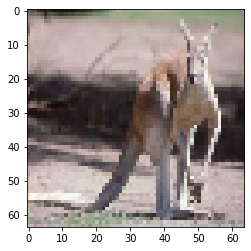

In [121]:
n=887
plt.imshow(x_test[887])
print(labels[np.argmax(y_test[887])])
print(labels[np.argmax(pred[887])])